In [278]:
# Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import warnings
from sklearn.metrics import precision_score,roc_curve,recall_score,confusion_matrix,plot_roc_curve


In [279]:
# Ignoring warnings
warnings.filterwarnings('ignore')


In [280]:
# Loading the data
titanic_data = pd.read_csv("train.csv")
pred_data = pd.read_csv("test.csv")

In [281]:
# Viewing the total number of rows and columns
titanic_data.shape

(891, 12)

In [282]:
# Viewing the first five rows
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [283]:
# Checking te datatype of each column
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [284]:
# Some missing values are observed in the column age and cabin
# As the number of missing values in the cabin are more dropping the column
# Also the columns passengerid and name are irrelevant for building the model
# Dropping the columns
titanic_data.drop(columns=["Cabin","PassengerId","Name","Ticket"],inplace=True)

In [285]:
# Checking the number of datapoints in the target variable
titanic_data["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [286]:
# The data seems to be reasonably balanced for building the model
input_feat= list(titanic_data.columns)
input_feat.remove("Survived")
num_feat = ["Age","Fare"]
cat_feat = ["Pclass","Sex","Parch","Embarked","SibSp"]
target_variable = "Survived"


In [287]:
# # Class for EDA analysis
# class EDA():
#     def plot_count(self,feature_list,hue=None):
#         for i in feature_list:
#             plt.figure(figsize=(15,10))
#             sns.countplot(x=i,hue=hue,data=titanic_data)
#             plt.xlabel(i,fontsize=12)
#             plt.ylabel("count",fontsize=12)
#             plt.xticks(fontsize=12)
#             plt.yticks(fontsize=12)
#             if hue:
#                 plt.legend(fontsize=14)
#             plt.show()
#     def plot_bar_num(self,feature_list):
#         for i in feature_list:
#             plt.figure(figsize=(15,10))
#             sns.barplot(x="Survived",y=i,data=titanic_data,ci=None)
#             plt.xlabel("Survived",fontsize=12)
#             plt.ylabel(i + " mean",fontsize=12)
#             plt.xticks(fontsize=12)
#             plt.yticks(fontsize=12)
#             plt.show()

In [288]:
# # EDA
# # Univariate analysis
# eda = EDA()
# eda.plot_count(cat_feat)


In [289]:
# # Bivariate analysis
# eda.plot_bar_num(num_feat)
# eda.plot_count(cat_feat,"Survived")

In [290]:
# Handling missing values
male_median_age = titanic_data[titanic_data["Sex"] == "male"]["Age"].median()
female_median_age = titanic_data[titanic_data["Sex"] == "female"]["Age"].median()
titanic_data.loc[titanic_data.Sex=="male","Age"] = titanic_data.loc[titanic_data.Sex=="male","Age"].fillna(titanic_data[titanic_data["Sex"] == "male"]["Age"].median())
titanic_data.loc[titanic_data.Sex=="female","Age"] = titanic_data.loc[titanic_data.Sex=="female","Age"].fillna(titanic_data[titanic_data["Sex"] == "female"]["Age"].median())
titanic_data["Sex"]=titanic_data["Sex"].apply(lambda x: 1 if x=="male" else 0)



In [291]:
# Creating dummy columns
titanic_data=pd.get_dummies(titanic_data,columns=["Pclass","Embarked"],drop_first=True)

In [292]:
# Defining inputs
features = list(titanic_data.columns)
features.remove("Survived")
output = ["Survived"]

In [293]:
# Data splitting

X,y = titanic_data[features],titanic_data[output]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) # random state is fixed to reproduce the same results



In [294]:
# Data scaling
feat_scal = ["Age","Fare"]
scaler = MinMaxScaler()
X_train[feat_scal] = scaler.fit_transform(X_train[feat_scal])
X_test[feat_scal] = scaler.transform(X_test[feat_scal])

In [295]:
model = LogisticRegression(random_state=42).fit(X_train, y_train)
model.score(X_train,y_train)


0.8105939004815409

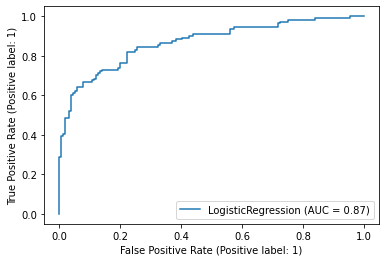

In [296]:
plot_roc_curve(model,X_test,y_test)

In [273]:
confusion_matrix(y_test,model.predict(X_test))

array([[137,  20],
       [ 33,  78]], dtype=int64)

In [277]:
precision_score(y_test,model.predict(X_test))

0.7959183673469388

In [276]:
recall_score(y_test,model.predict(X_test))

0.7027027027027027

In [214]:
model.score(X_test,y_test)

0.8022388059701493